In [1]:
import matplotlib.pyplot as plt
import matplotlib
from utils import *

OutFilePath = 'data/西安城市形象数据.pkl'

In [2]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


In [6]:
weibo_add = pd.read_csv("data/西安微博补充.csv")
weibo_add.rename(columns={
    '微博正文': '内容',
    'user_id': 'user_tag'
},
                    inplace=True)
weibo_add = weibo_add[['user_tag', '内容', '转发数', '评论数', '点赞数', '发布时间']]
weibo_add['平台'] = '微博'
weibo_add[['发布时间']] = weibo_add[['发布时间']].applymap(search_time_string)
weibo_add['发布时间月份'] = weibo_add['发布时间'].dt.strftime('%Y-%m')
weibo_add['发布时间月份'].unique()

array(['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01'],
      dtype=object)

In [6]:
weibo_add = pd.read_csv("data/西安.csv")
weibo_add.rename(columns={
    '微博正文': '内容',
    'user_id': 'user_tag'
},
                    inplace=True)
weibo_add = weibo_add[['user_tag', '内容', '转发数', '评论数', '点赞数', '发布时间']]
weibo_add['平台'] = '微博'
weibo_add[['发布时间']] = weibo_add[['发布时间']].applymap(search_time_string)
weibo_add['发布时间月份'] = weibo_add['发布时间'].dt.strftime('%Y-%m')
weibo_add['发布时间月份'].unique()

array(['2022-06', '2022-07'], dtype=object)

In [7]:
data_weibo_during_the_covid_period = weibo_add.copy()
data_weibo_during_the_covid_period['发布时间日期'] = data_weibo_during_the_covid_period['发布时间'].dt.strftime('%Y-%m-%d')
# 发布数统计（时间段）
data_date_count = pd.DataFrame()
data_date_count['总数'] = get_app_group_counts(data_weibo_during_the_covid_period, '发布时间日期')
for app_name in ['豆瓣','知乎','微博']:
    data_date_count[app_name] = get_app_group_counts(data_weibo_during_the_covid_period, '发布时间日期', app_name, is_fill_zero=True)
data_date_count = data_date_count.fillna(0)

In [8]:
data_date_count

,总数,豆瓣,知乎,微博
发布时间日期,,,,
2022-06-01,173,0,0,173
2022-06-02,175,0,0,175
2022-06-03,192,0,0,192
2022-06-04,151,0,0,151
2022-06-07,350,0,0,350
2022-06-14,124,0,0,124
2022-07-05,386,0,0,386
2022-07-08,327,0,0,327
2022-07-09,1,0,0,1


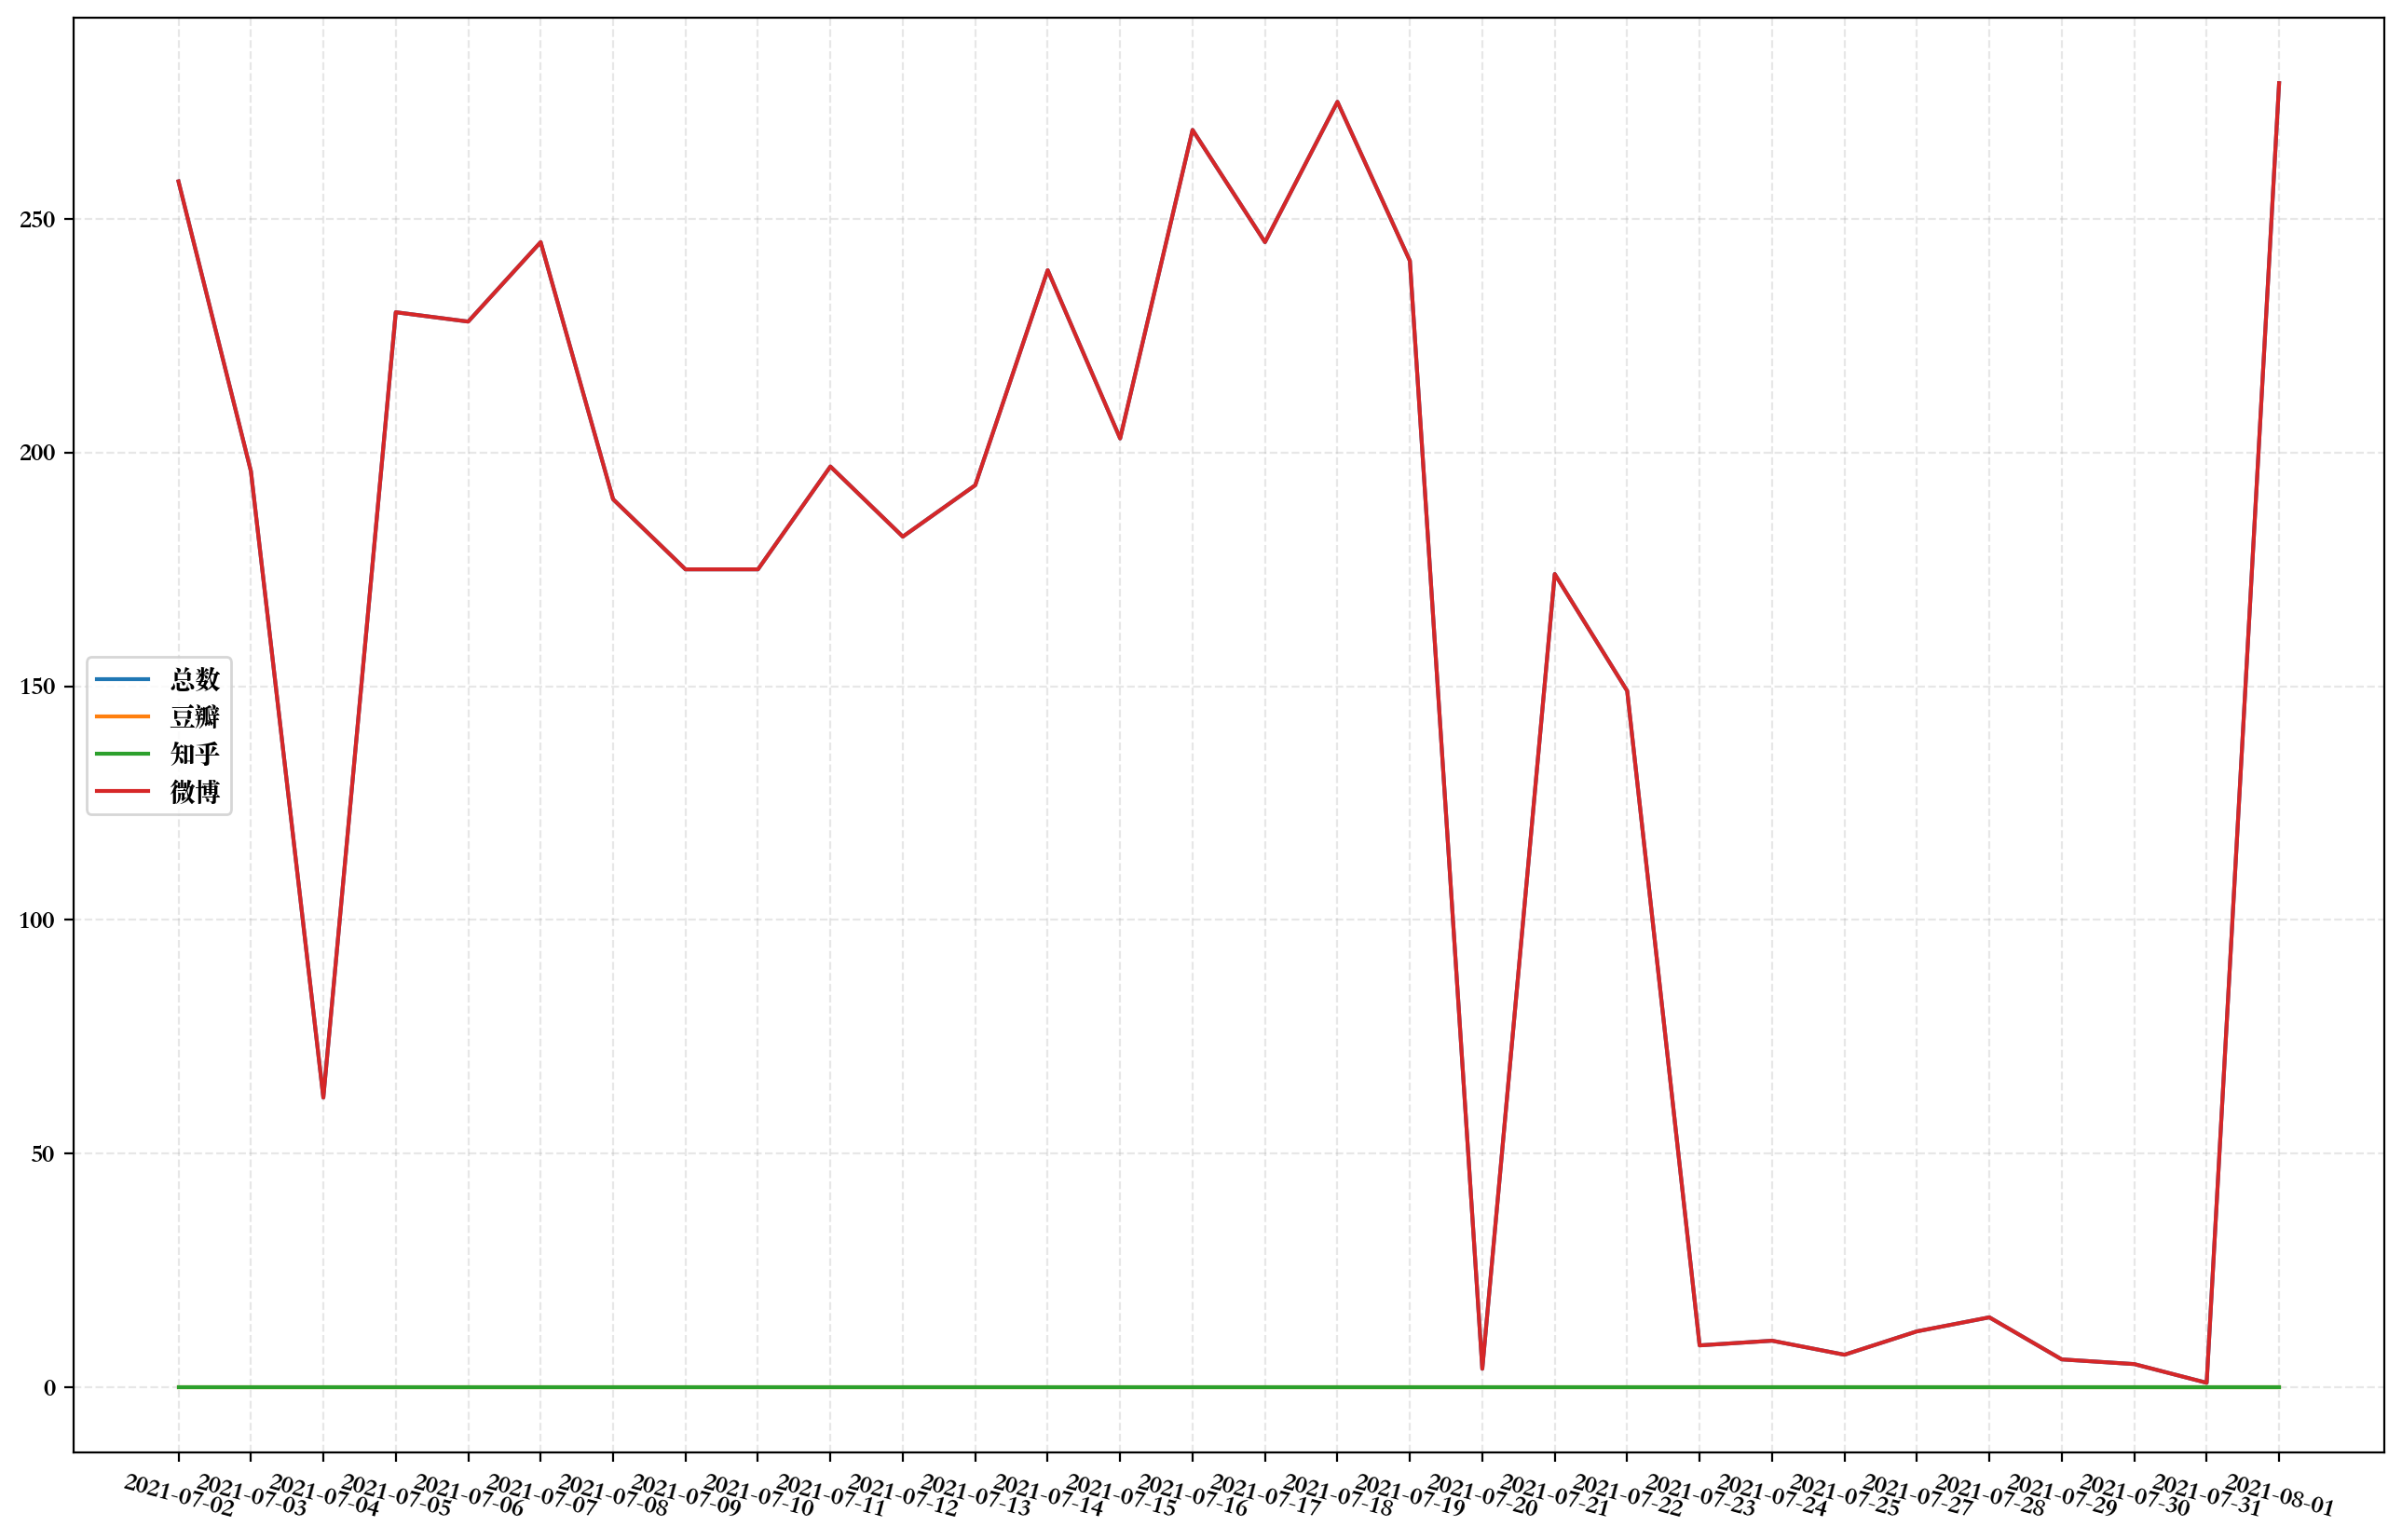

In [6]:
ax = data_date_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(len(data_date_count.index)))
ax.set_xticklabels(data_date_count.index)
ax.set_xlabel("")
plt.xticks(rotation=-15)
plt.show()

In [9]:
# 微博
weibo = pd.read_csv("data/西安微博.csv")
weibo.rename(columns={'微博正文': '内容', 'user_id': 'user_tag'}, inplace=True)
weibo = weibo[['user_tag', '内容', '转发数', '评论数', '点赞数', '发布时间']]
weibo['平台'] = '微博'

# 剔除掉补爬日期的内容
weibo[['发布时间']] = weibo[['发布时间']].applymap(search_time_string)
weibo['发布时间月份'] = weibo['发布时间'].dt.strftime('%Y-%m')
weibo['发布时间日期'] = weibo['发布时间'].dt.strftime('%Y-%m-%d')

In [10]:
weibo_count = get_app_group_counts(weibo,'发布时间日期','微博','weibo_count')

In [13]:
a = pd.DataFrame({'publish_num':weibo_count})

In [15]:
a[a['publish_num']>300]

,publish_num
发布时间日期,
2018-07-10,309
2018-10-02,304
2018-10-04,306
2019-02-02,305
2019-02-19,310
2019-05-20,302
2022-03-05,322
2022-03-09,303
2022-04-05,316


In [16]:
weibo = weibo[(weibo['发布时间月份']<'2021-07')|(weibo['发布时间月份']>'2021-12')]
weibo = weibo[weibo['发布时间月份']<'2022-07']

In [17]:
weibo['发布时间月份'].unique()

array(['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
       '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
      dtype=object)